In [1]:
from odo import odo

In [2]:
import pandas as pd
import scipy.stats
import numpy as np
import statsmodels
from copy import copy
%pylab inline
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
data_pairedWS=odo('ML2015_PairedWatershedBR.csv', pd.DataFrame)
#data=pd.read_csv('ML2015_PairedWatershedBR.csv')
data_ponds=odo('Pond_Data.csv', pd.DataFrame)

def data_cleanup_output_list_float(data,DATE):
    columns=list(data.columns.values)
    #columns_copy=copy.copy(columns)

#this loop takes any columns that are not float type and 'coerces' their data into float data 
# and appends a copy of that float type field.
#any data that it cannot turn into a float number will be converted to 'NaN'
    for col in columns:
        #print col
        data[' ' + str(col)+' ']=pd.to_numeric(data[col], errors='coerce')
        #print columns

#changes the date column into date format by the same coercive method
    data['DATE_FORMAT']=pd.to_datetime(data[str(DATE)], errors='coerce', format="%m/%d/%Y")
    print data
    columns=list(data.columns.values)
    print columns

#creating a list of field data types
    coltype_lis=[]
    coltype=data.dtypes
    for col in coltype:
        coltype_lis.append(col)
    #print coltype_lis

#making a list of tuples of the field name and type of data in the field
    col_name_typ=zip(columns,coltype_lis)
    print col_name_typ

#making a list of field names with float data types
    colNameTypeFloat=[]
    for col in col_name_typ:
        if col[1] == np.dtype(float):
            colNameTypeFloat.append(col[0])
    return colNameTypeFloat

#data_cleanup_output_list_float(data_ponds,'DATE')

stations = list(pd.unique(data_pairedWS.Dist_or_Undist.ravel()))
ponds = list(pd.unique(data_ponds.Pond.ravel()))
print stations
print ponds

undist_dist_stat=list(copy(stations))
del undist_dist_stat[2]
print undist_dist_stat


[u'undisturbed', u'disturbed', u'baseline']
[u'CIII-14', u'CIII-11']
[u'undisturbed', u'disturbed']


    Dist_or_Undist Stat_Name       Date     Flow_GPM    pH TDS(mg_L)  \
0      undisturbed      ML-1 1989-03-07          824  5.90        70   
1      undisturbed      ML-1 1989-06-30         1279  5.60        80   
2      undisturbed      ML-1 1989-07-25          224  5.70        65   
3      undisturbed      ML-1 1989-10-30         2677  5.70       103   
4      undisturbed      ML-1 1990-01-05          723  6.50        65   
5      undisturbed      ML-1 1990-01-18         7686  5.60        80   
6      undisturbed      ML-1 1990-04-02          846  6.60        73   
7      undisturbed      ML-1 1990-07-03          NaN  6.20        92   
8      undisturbed      ML-1 1990-09-28          NaN  5.90        55   
9      undisturbed      ML-1 1991-01-16         1194   NaN        49   
10     undisturbed      ML-1 1991-01-21         1062   NaN        64   
11     undisturbed      ML-1 1991-04-05          842   NaN        58   
12     undisturbed      ML-1 1991-07-05          464   NaN      

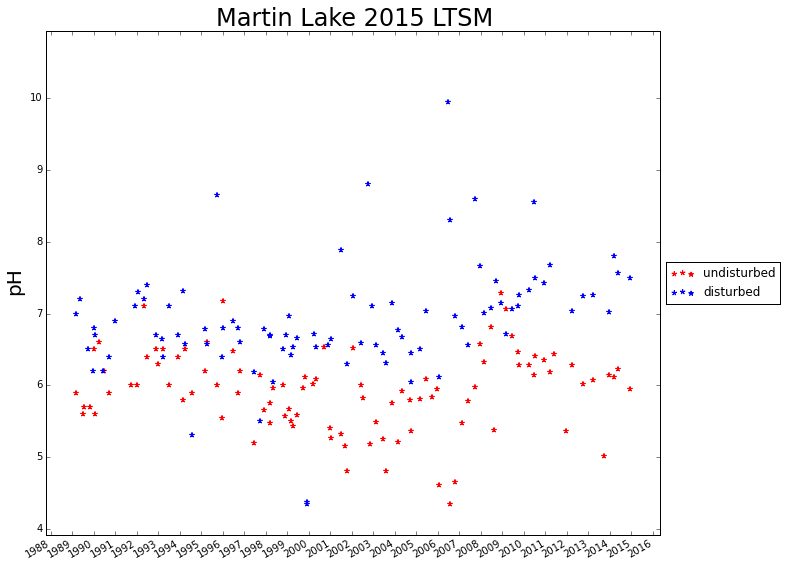

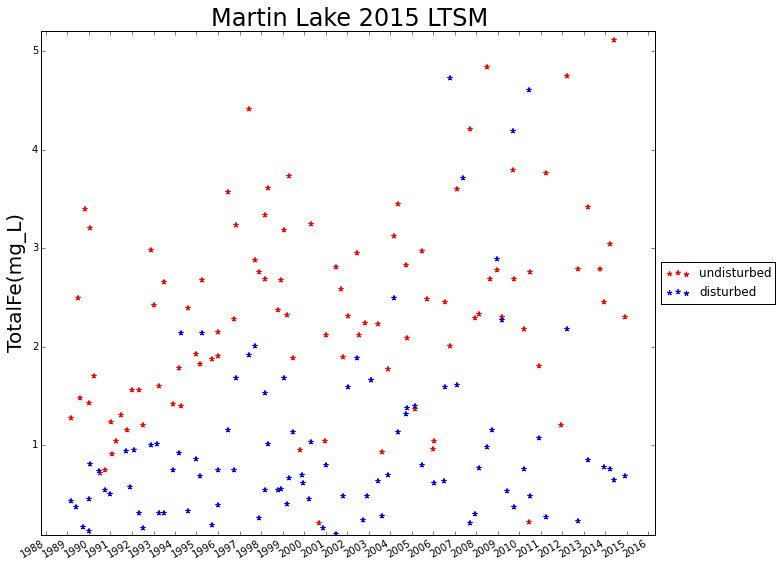

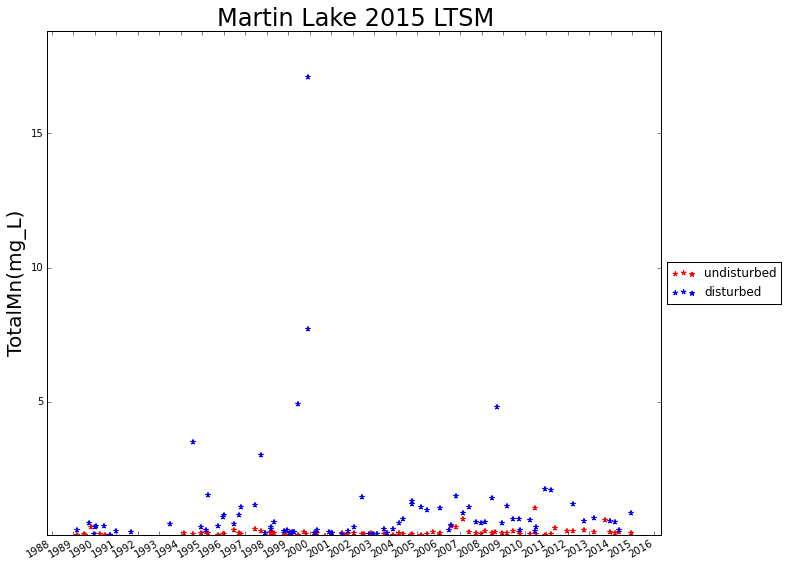

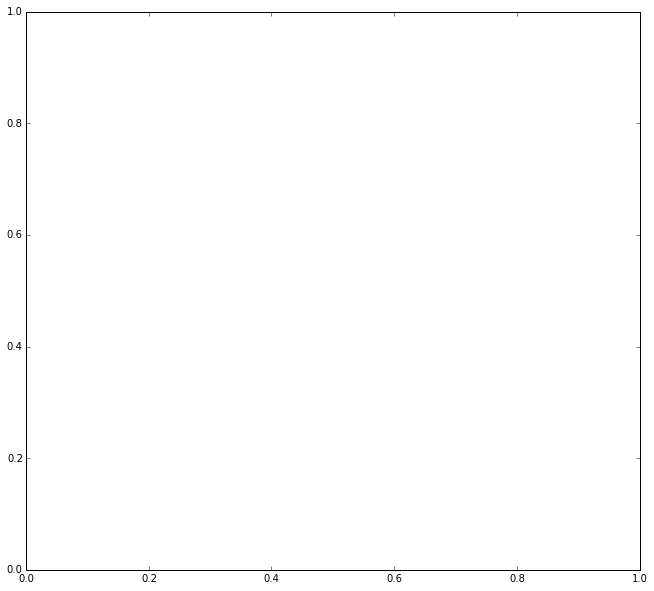

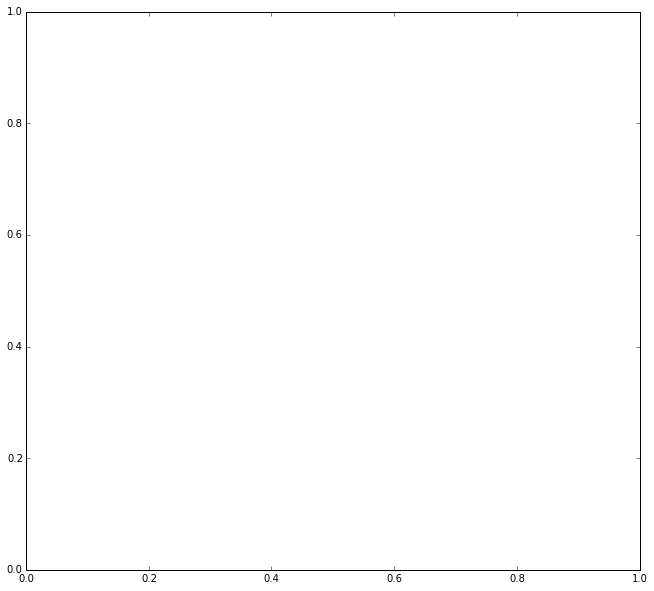

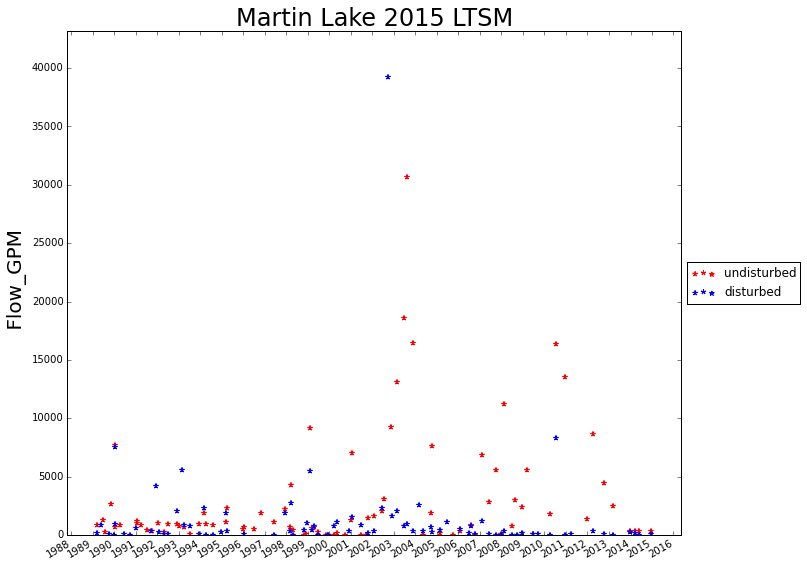

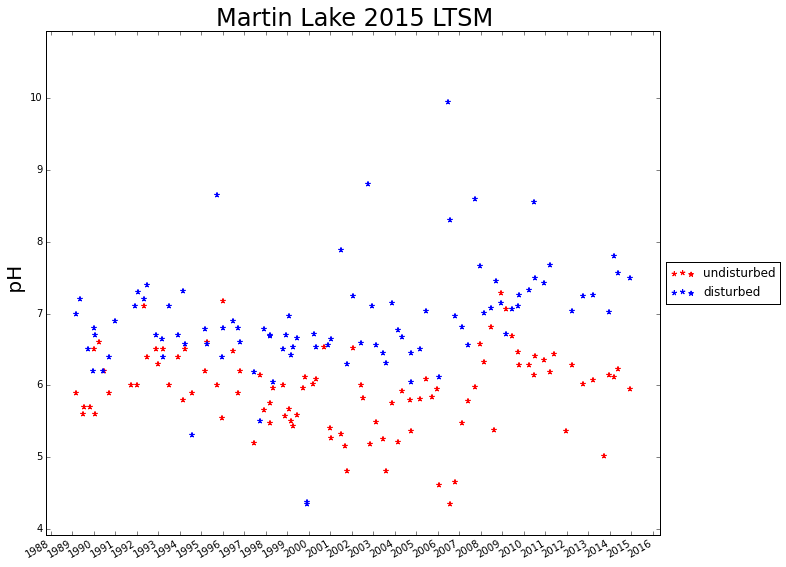

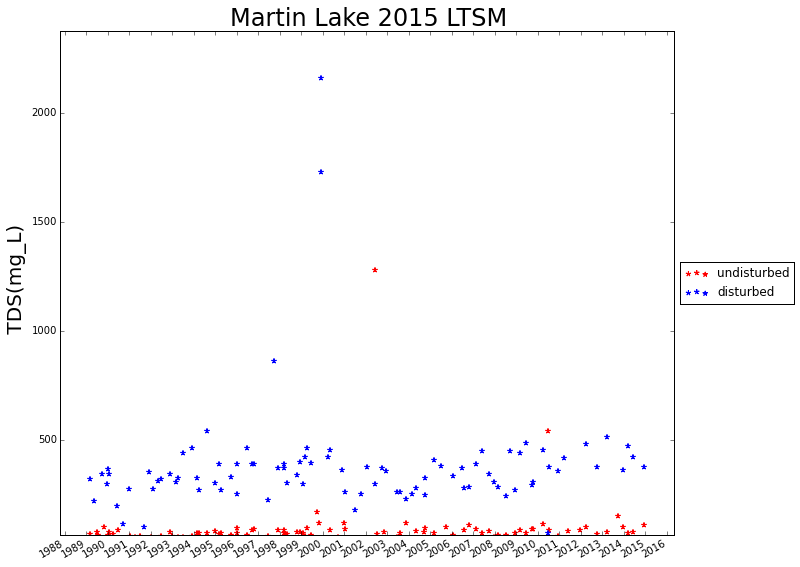

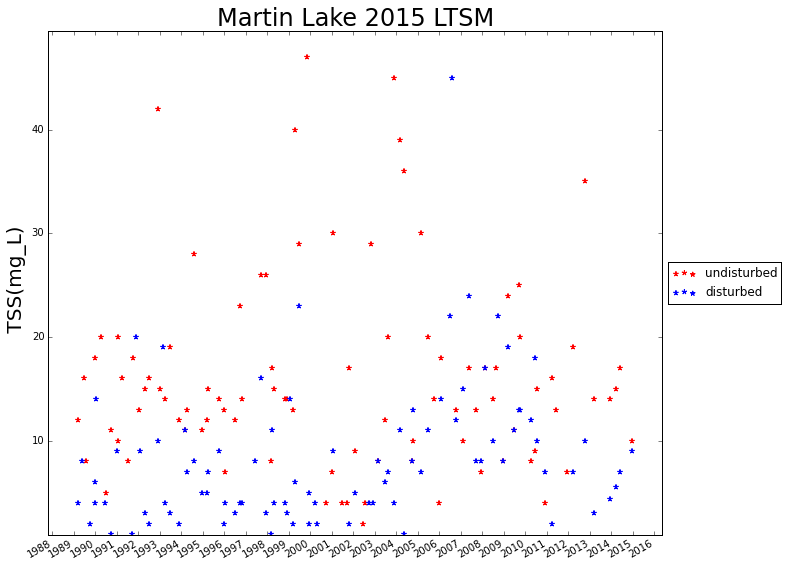

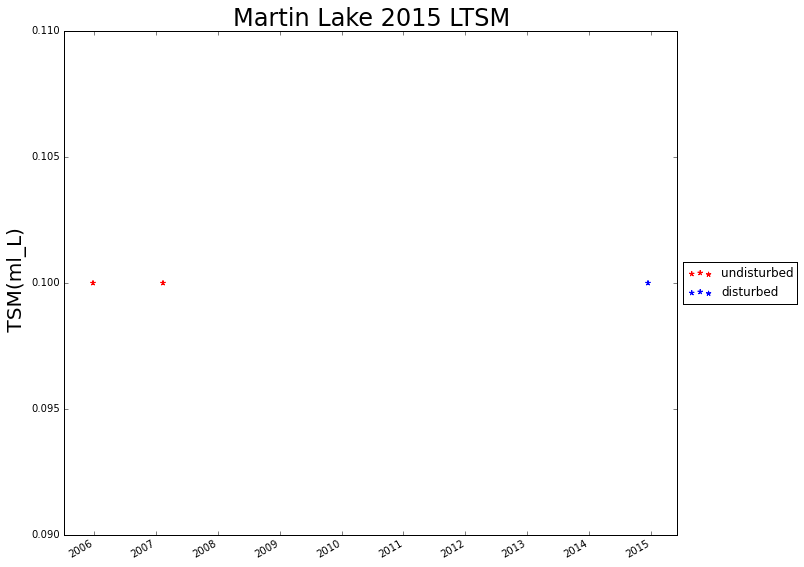

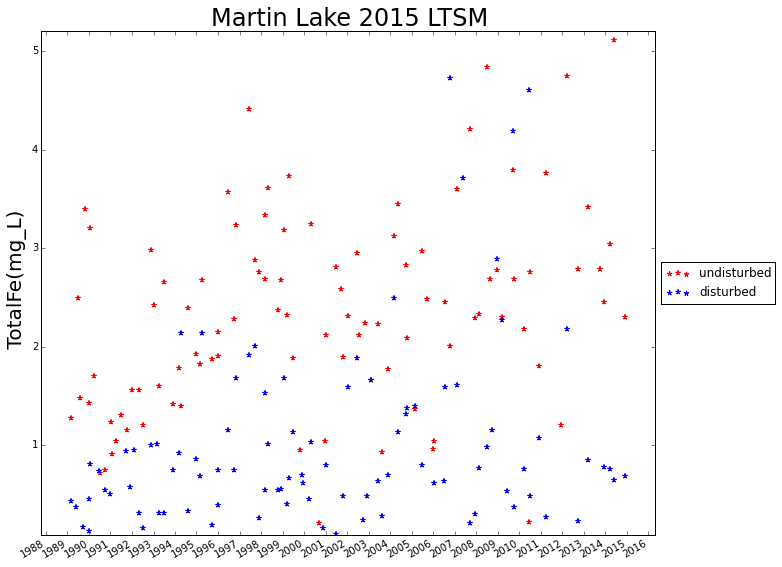

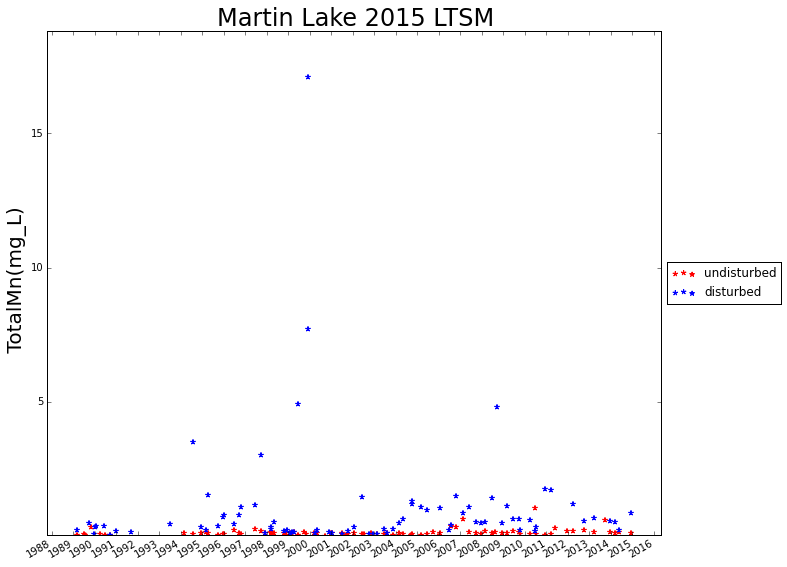

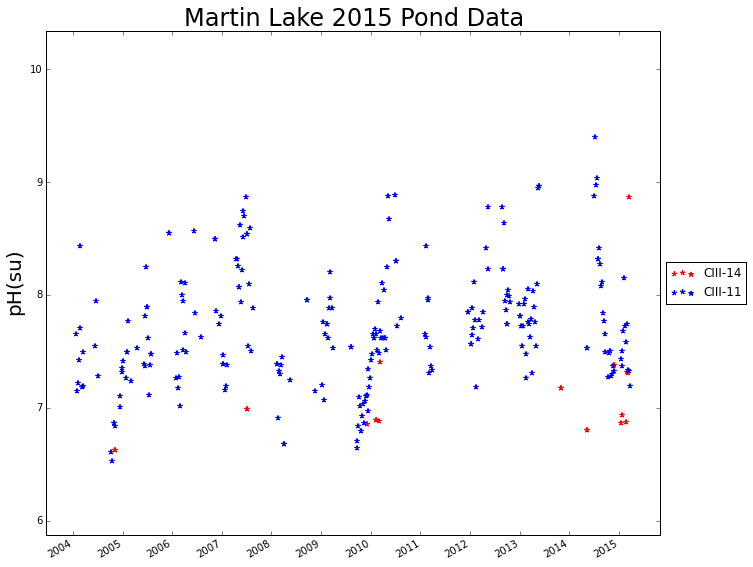

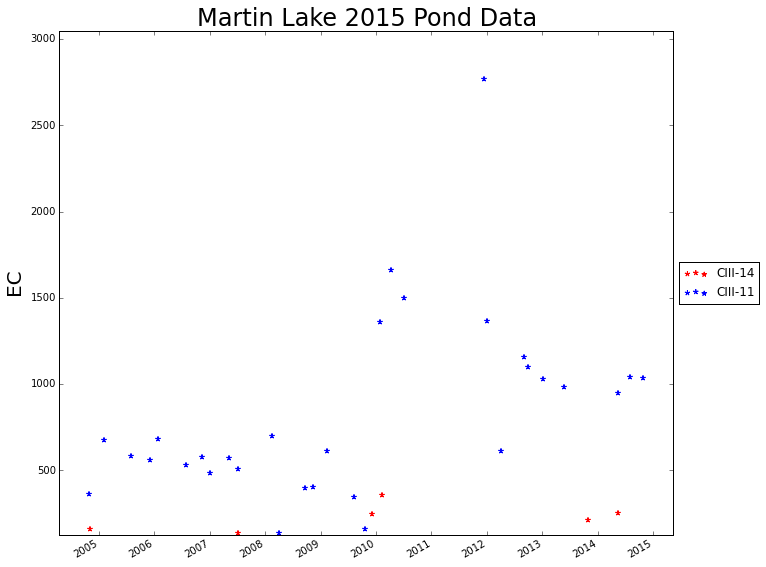

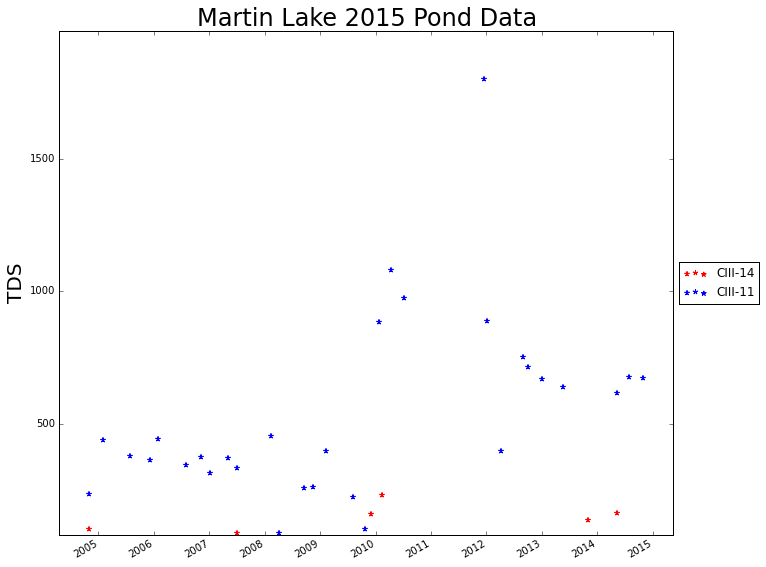

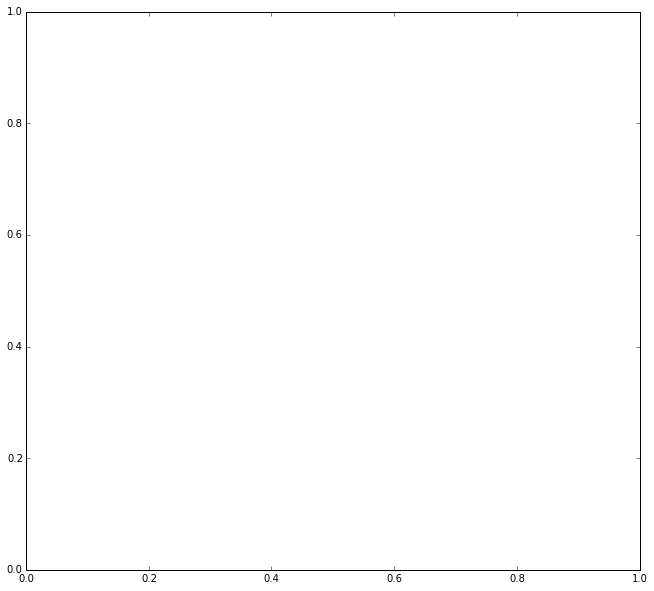

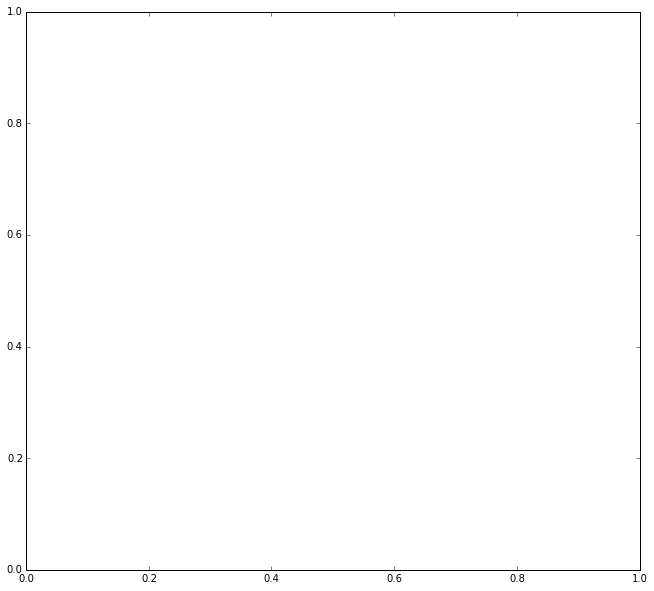

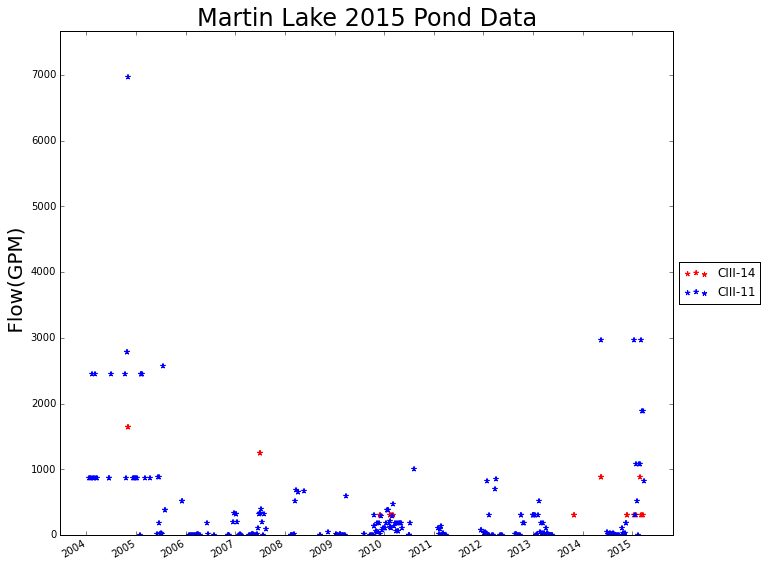

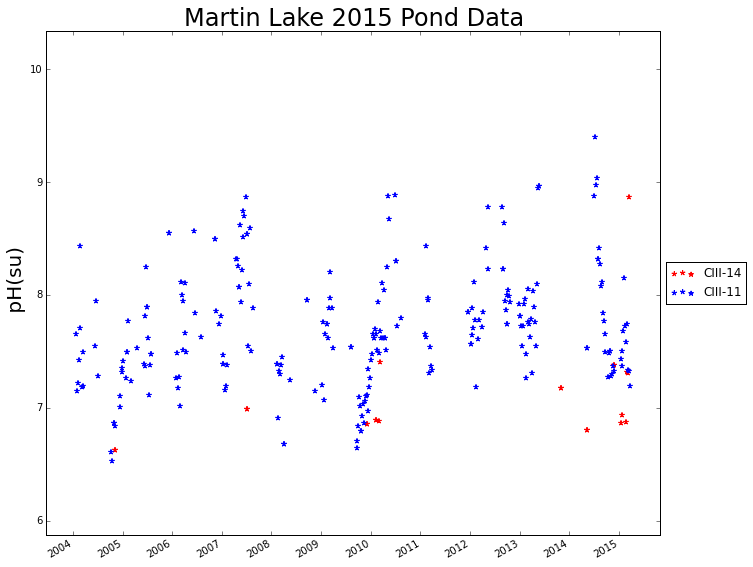

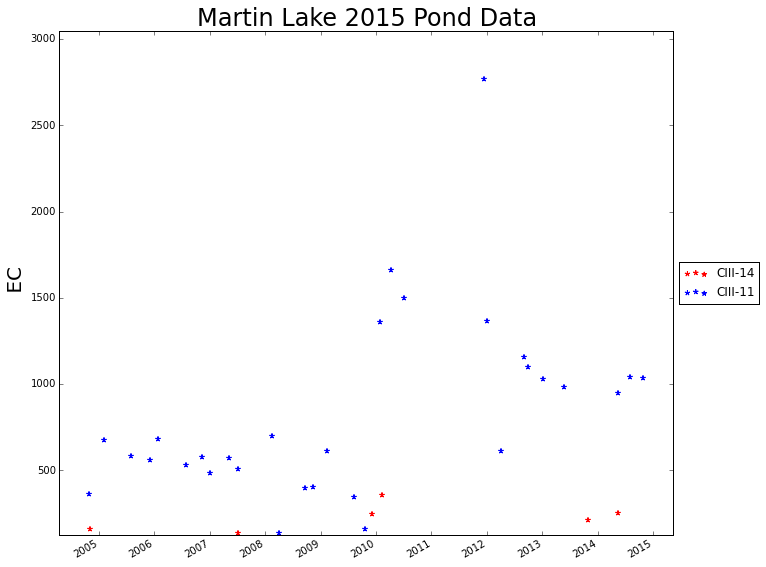

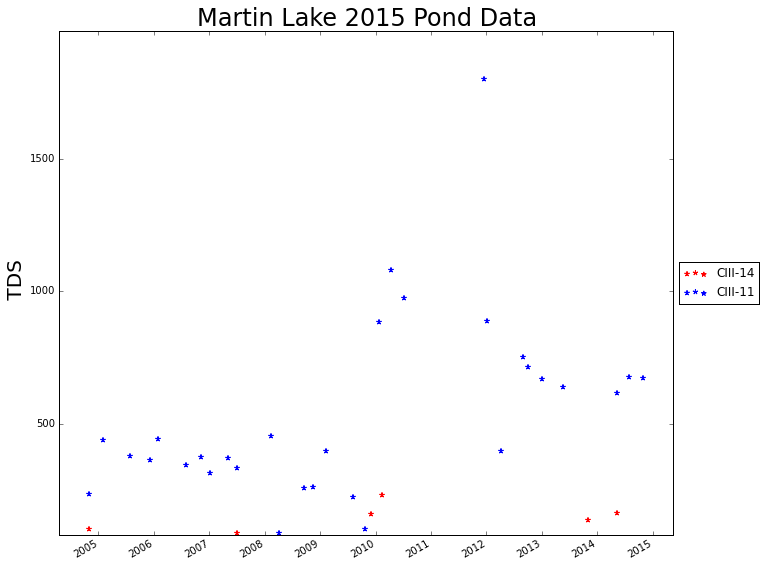

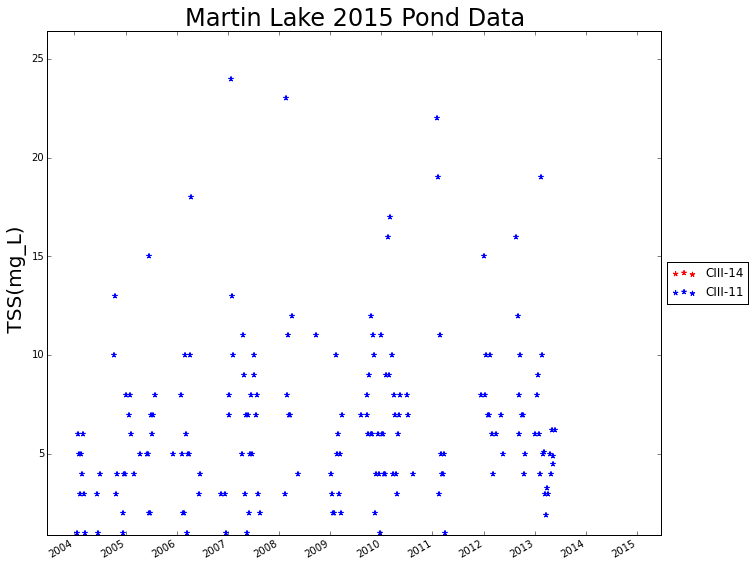

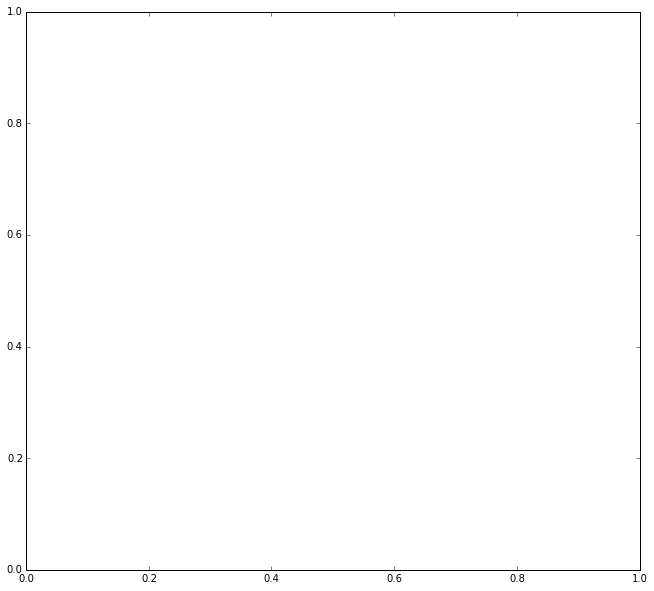

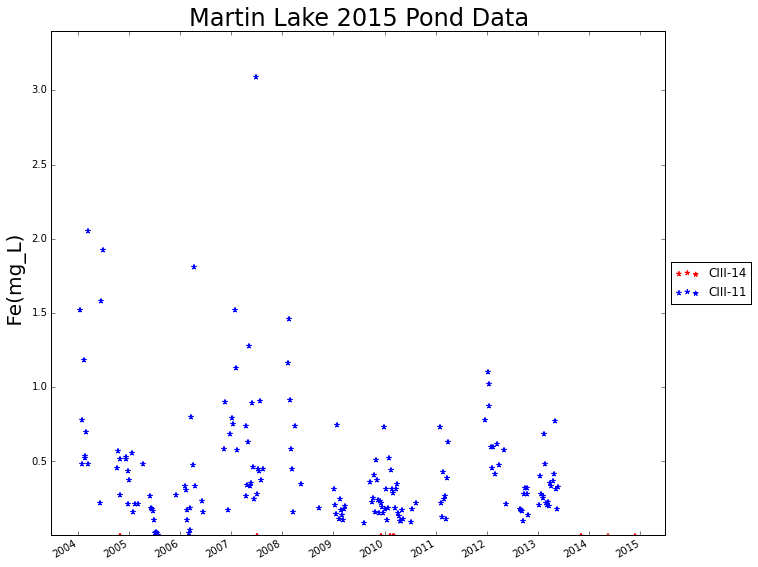

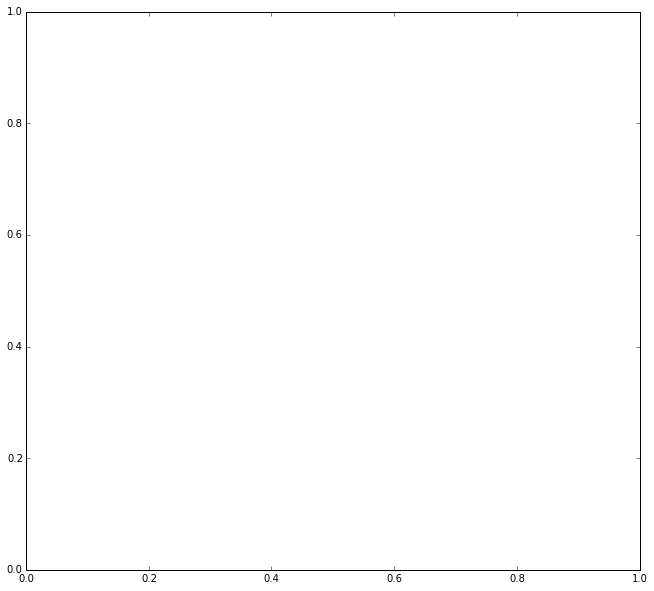

In [9]:
#ALL CAPS means this variable is a field name
#underscores means that this variable is a list
def graphs(data, DATE, CATEGORYFIELD, field_type_float_y_axis, 
           category_list_for_comparison, nameOfGraph):
    #CATEGORYFIELD is the field with the various stations or ponds that will be compared on 
    #the graph
    
    #field_type_float_y_axis is a list of all the fields aka constituents that will be 
    #graphed on the y-axis...these fields must be float type
    for index, CONSTIT in enumerate(field_type_float_y_axis):
        fig, ax=subplots(figsize=(11,10))
        #fig, ax=subplots(2, sharex=True, figsize=(11,10))
        colors_list=['r','b','g','y']
        p=0
        # category_list_for_comparison are a list of all the stations and/or ponds that will 
        #be on the single graph of that constituent
        while p <= len(category_list_for_comparison)-1:
            output=data[data[CATEGORYFIELD].isin([category_list_for_comparison[p]])]
            output=output[np.isfinite(output[CONSTIT])]
            date=list(output[DATE])
            constit=list(output[CONSTIT])
            s1 = pd.Series(constit, index=date)
            try:
                ymin=min(constit)*0.9
                ymax=max(constit)*1.1
            except ValueError:
                ymin=0
                ymax=10
            
            """print str(minimum)+str(maximum)
            print str(CONSTIT)
            print str(category_list_for_comparison[p])
            print s1"""
            try:
                #ax.plot(s1.index.to_pydatetime(), s1.values, label=category_list_for_comparison[p])
                #ax.semilogy(s1.index.to_pydatetime(), s1.values, label=category_list_for_comparison[p], color=str(colors_list[p]))
                ax.scatter(s1.index.to_pydatetime(), s1.values, 
                           label=category_list_for_comparison[p], 
                           color=str(colors_list[p]), marker=(5,2), s=20)
                ax.xaxis.set_major_locator(YearLocator())
                ax.xaxis.set_major_formatter(DateFormatter('%Y'))
                ax.set_ylim([ymin,ymax])
                fig.autofmt_xdate()
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                ylabel(str(CONSTIT), fontsize=20)                
                title(str(nameOfGraph), fontsize=24)
                
            except AttributeError:
                break
            p+=1
        savefig('graphs/'+str(CATEGORYFIELD) + " " + str(CONSTIT)+"_v_Date" + ".png", bbox_inches="tight");

            
graphs(data_pairedWS, "DATE_FORMAT", "Dist_or_Undist",
       data_cleanup_output_list_float(data_pairedWS,'Date'), undist_dist_stat,"Martin Lake 2015 LTSM")
graphs(data_ponds, "DATE_FORMAT", "Pond", data_cleanup_output_list_float(data_ponds,'DATE'), ponds,"Martin Lake 2015 Pond Data")

In [10]:
print len(stations)

3


In [12]:
Disturbed=data_pairedWS[data_pairedWS['Dist_or_Undist'].isin(['disturbed'])]
BL=data_pairedWS[data_pairedWS['Dist_or_Undist'].isin(['baseline'])]
Undisturbed=data_pairedWS[data_pairedWS['Dist_or_Undist'].isin(['undisturbed'])]

CIII_11= data_ponds[data_ponds['Pond'].isin(['CIII-11'])]
CIII_14= data_ponds[data_ponds['Pond'].isin(['CIII-14'])]


#print Disturbed
#print BL
#print Undisturbed
print "Disturbed station data " + "\n" + str(Disturbed.describe())
print "Baseline station data " + "\n" + str(BL.describe()) + "\n"

print "CIII-11 " + "\n" + str(CIII_11.describe())
print "CIII-14 " + "\n" + str(CIII_14.describe())

BL_FLOW=BL[' Flow_GPM ']
UNDIST_FLOW=Undisturbed[' Flow_GPM ']
DIST_FLOW=Disturbed[' Flow_GPM ']

Kruskal_Wallace_BL=scipy.stats.mstats.kruskalwallis(DIST_FLOW, BL_FLOW)
Kruskal_Wallace_UNDIST=scipy.stats.mstats.kruskalwallis(DIST_FLOW, UNDIST_FLOW)

Disturbed station data 
              pH  TotalFe(mg_L)  TotalMn(mg_L)   Dist_or_Undist    Stat_Name   \
count  91.000000      93.000000      82.000000                 0            0   
mean    6.896593       1.022559       1.017976               NaN          NaN   
std     0.782810       0.921876       2.149627               NaN          NaN   
min     4.350000       0.100000       0.050000               NaN          NaN   
25%     6.545000       0.461000       0.232500               NaN          NaN   
50%     6.800000       0.750000       0.486500               NaN          NaN   
75%     7.220000       1.160000       1.023250               NaN          NaN   
max     9.940000       4.730000      17.100000               NaN          NaN   

              Date      Flow_GPM         pH    TDS(mg_L)    TSS(mg_L)   \
count  1.070000e+02     84.000000  91.000000    92.000000    90.000000   
mean   1.008611e+18   1358.967857   6.896593   382.260870     8.421111   
std    2.359147e+17   44

In [13]:
print str(Kruskal_Wallace_BL) + " for baseline to disturbed flow comparison"
print str(Kruskal_Wallace_UNDIST) + " for undisturbed to disturbed flow comparison"

KruskalResult(statistic=0.63482295363423435, pvalue=0.42559172197429529) for baseline to disturbed flow comparison
KruskalResult(statistic=16.672654528704363, pvalue=4.4416664499177237e-05) for undisturbed to disturbed flow comparison


In [14]:
HStat_KW=Kruskal_Wallace_BL[0]
Pval_KW=Kruskal_Wallace_BL[1]
print "The flow from the Baseline station and the Disturbed station have a Kruskal Wallace H-statistic of "+ str(HStat_KW)+" and a P value of "+ str(Pval_KW )

The flow from the Baseline station and the Disturbed station have a Kruskal Wallace H-statistic of 0.634822953634 and a P value of 0.425591721974


In [15]:
"""This part of the program is meant to provide a trend analysis for TDS using
Mann-Kendall Test for trends"""
#import numpy as np
#import statistics as st from scipy.interpolate 
#import interp1d from scipy.stats 
#import norm, chi2 from scipy.stats 
#import scoreatpercentile, nanmean

def mk_test(x, alpha = 0.05): 
    """ this perform the MK (Mann-Kendall) test to check if there is any trend present in data or not
    Input:
        x:   a vector of data
        alpha: significance level

    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the sifnificance test
        z: normalized test statistics

    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05)
    """
    n = len(x)

    # calculate S
    s = 0
    for k in xrange(n-1):
        for j in xrange(k+1,n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x = np.unique(x)
    g = len(unique_x)

    # calculate the var(s)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else: # there are some ties in data
        tp = np.zeros(unique_x.shape)
        for i in xrange(len(unique_x)):
            tp[i] = sum(unique_x[i] == x)
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
            z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)

    # calculate the p_value
    p = 2*(1-scipy.stats.norm.cdf(abs(z))) # two tail test
    h = abs(z) > scipy.stats.norm.ppf(1-alpha/2)

    if (z<0) and h:
        trend = 'decreasing'
    elif (z>0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z
#####################################################################################


def mkTest_INPUT_COLUMN_NAMES_LIST(data, lis, STATION, DATE, CONSTITUENT):
    i=0
    while i <= len(lis)-1:

        mkoutput=data[data[STATION].isin([lis[i]])]
        mkoutput = mkoutput[np.isfinite(mkoutput[CONSTITUENT])]
        mkoutput.set_index(DATE)
        stat_constit=list(mkoutput[CONSTITUENT])
        stat_date=list(mkoutput[DATE])
        s1 = pd.Series(stat_constit, index=stat_date)
        test_trend,h,p,z=mk_test(stat_constit, alpha = 0.05)

        print "Mann-Kendall Test for Trend with non-parametric data "+str(CONSTITUENT)
        print "STATION "+ str(lis[i])
        print test_trend, h
        print "Z="+str(z)+" P="+ str(p) 
        #print str(s1[:]) + "\n"
        print "\n"
        i+=1
#colNameTypeFloat is the list of column names that have float type data
for colname in data_cleanup_output_list_float(data_pairedWS,'DATE_FORMAT'): 
    mkTest_INPUT_COLUMN_NAMES_LIST(data_pairedWS, stations,'Dist_or_Undist', 'DATE_FORMAT', colname)
    
for colname in data_cleanup_output_list_float(data_ponds,'DATE_FORMAT'): 
    mkTest_INPUT_COLUMN_NAMES_LIST(data_ponds, ponds,'Pond', 'DATE_FORMAT', colname)

    Dist_or_Undist Stat_Name       Date     Flow_GPM    pH TDS(mg_L)  \
0      undisturbed      ML-1 1989-03-07          824  5.90        70   
1      undisturbed      ML-1 1989-06-30         1279  5.60        80   
2      undisturbed      ML-1 1989-07-25          224  5.70        65   
3      undisturbed      ML-1 1989-10-30         2677  5.70       103   
4      undisturbed      ML-1 1990-01-05          723  6.50        65   
5      undisturbed      ML-1 1990-01-18         7686  5.60        80   
6      undisturbed      ML-1 1990-04-02          846  6.60        73   
7      undisturbed      ML-1 1990-07-03          NaN  6.20        92   
8      undisturbed      ML-1 1990-09-28          NaN  5.90        55   
9      undisturbed      ML-1 1991-01-16         1194   NaN        49   
10     undisturbed      ML-1 1991-01-21         1062   NaN        64   
11     undisturbed      ML-1 1991-04-05          842   NaN        58   
12     undisturbed      ML-1 1991-07-05          464   NaN      